In [219]:
# Dependencies and Setup
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import f_oneway

In [220]:
dt = pd.read_csv('salaries_cyber.csv')

In [221]:
dt.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S
5,2022,EX,FT,Application Security Architect,315000,USD,315000,US,100,US,L
6,2022,SE,FT,Security Researcher,220000,USD,220000,US,100,US,M
7,2022,SE,FT,Security Researcher,140000,USD,140000,US,100,US,M
8,2021,MI,FT,Information Security Compliance Analyst,55000,GBP,75650,GB,50,GB,L
9,2022,EX,FT,Information Security Compliance Manager,360000,USD,360000,TW,100,SG,L


In [222]:
dt.shape

(1247, 11)

In [223]:
dt.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


JOBS BY SPECIFIC TITLES

In [224]:
specific_job_titles = np.unique(dt['job_title'])
total_specific_job_titles = len(specific_job_titles)
print("Total number of specific job titles:", total_specific_job_titles)
column_values = dt['job_title']
unique_values = np.unique(column_values)
print(unique_values)

Total number of specific job titles: 87
['Application Security Analyst' 'Application Security Architect'
 'Application Security Engineer' 'Application Security Specialist'
 'Azure Security Engineer' 'Chief Information Security Officer'
 'Cloud Security Architect' 'Cloud Security Engineer'
 'Cloud Security Engineering Manager'
 'Computer Forensic Software Engineer' 'Concierge Security Engineer'
 'Corporate Infrastructure Security Engineer'
 'Corporate Security Engineer' 'Cyber Program Manager'
 'Cyber Security Analyst' 'Cyber Security Architect'
 'Cyber Security Consultant' 'Cyber Security Engineer'
 'Cyber Security Researcher' 'Cyber Security Specialist'
 'Cyber Security Training Specialist' 'Cyber Threat Analyst'
 'Cyber Threat Intelligence Analyst' 'Data Security Analyst'
 'Detection Engineer' 'DevOps Security Engineer' 'DevSecOps Engineer'
 'Digital Forensics Analyst' 'Director of Information Security'
 'Enterprise Security Engineer' 'Ethical Hacker'
 'Head of Information Security' 

LOCATIONS OF THE COMPANY

In [225]:
specific_company_locations = np.unique(dt['company_location'])
total_specific_company_locations = len(specific_company_locations)
print("Total number of company locations:", total_specific_company_locations)
column_values = dt['company_location']
unique_values = np.unique(column_values)
print(unique_values)

Total number of company locations: 55
['AE' 'AF' 'AQ' 'AR' 'AT' 'AU' 'AX' 'AZ' 'BE' 'BR' 'BW' 'CA' 'CH' 'CL'
 'CZ' 'DE' 'DK' 'DZ' 'EE' 'EG' 'ES' 'ET' 'FR' 'GB' 'GR' 'HR' 'HU' 'ID'
 'IE' 'IL' 'IN' 'IT' 'JP' 'KE' 'LU' 'MX' 'NL' 'NO' 'NZ' 'PK' 'PL' 'PT'
 'RO' 'RS' 'RU' 'SA' 'SE' 'SG' 'SI' 'TR' 'TW' 'UM' 'US' 'VN' 'ZA']


EMPLOYEE RESIDENCES

In [226]:
specific_employee_residences = np.unique(dt['employee_residence'])
total_specific_employee_residences = len(specific_employee_residences)
print("Total number of employee residences:", total_specific_employee_residences)
column_values = dt['employee_residence']
unique_values = np.unique(column_values)
print(unique_values)

Total number of employee residences: 58
['AE' 'AF' 'AR' 'AT' 'AU' 'AZ' 'BE' 'BG' 'BR' 'BW' 'CA' 'CH' 'CL' 'CR'
 'CZ' 'DE' 'DK' 'DZ' 'EE' 'EG' 'ES' 'ET' 'FR' 'GB' 'GH' 'GR' 'HR' 'HU'
 'ID' 'IE' 'IL' 'IN' 'IR' 'IT' 'JP' 'KE' 'KG' 'LT' 'LU' 'MX' 'NG' 'NL'
 'NO' 'NZ' 'PK' 'PL' 'PT' 'RO' 'RU' 'SA' 'SE' 'SG' 'SI' 'TR' 'TW' 'US'
 'VN' 'ZA']


The dataset displays 4 different experience levels: 

In [227]:
experience_levels = np.unique(dt['experience_level'])
total_experience_levels = len(experience_levels)
print("Total number of experience levels:", total_experience_levels)
column_values = dt['experience_level']
unique_values = np.unique(column_values)
print(unique_values)

Total number of experience levels: 4
['EN' 'EX' 'MI' 'SE']


EMPLOYMENT TYPES

In [228]:
employment_types = np.unique(dt['employment_type'])
total_employment_types = len(employment_types)
print("Employment types:", total_employment_types)
column_values = dt['employment_type']
unique_values = np.unique(column_values)
print(unique_values)

Employment types: 4
['CT' 'FL' 'FT' 'PT']


Currency Types

In [229]:
currency_types = np.unique(dt['salary_currency'])
total_currency_types = len(currency_types)
print("Currency types:", total_currency_types)
column_values = dt['salary_currency']
unique_values = np.unique(column_values)
print(unique_values)

Currency types: 21
['AUD' 'BRL' 'CAD' 'CHF' 'DKK' 'EUR' 'GBP' 'HUF' 'IDR' 'ILS' 'INR' 'MXN'
 'NOK' 'NZD' 'PLN' 'RUB' 'SEK' 'SGD' 'TWD' 'USD' 'ZAR']


Calculation  of Average Salary (all curencies)

In [230]:
average_salary = np.mean(dt["salary"])
print(f"Average salary: ${average_salary:.2f}")

Average salary: $560852.49


Average Salary in terms of USD

In [231]:
average_salary_usd = np.mean(dt["salary_in_usd"])
print(f"Average Salary in terms of USD: ${average_salary_usd:.2f}")

Average Salary in terms of USD: $120278.22


Salary based on Employment Type

In [232]:
average_salary_employment = dt.groupby('employment_type')['salary_in_usd'].mean()
average_salary_employbasis = average_salary_employment.reset_index()
print(average_salary_employbasis)

  employment_type  salary_in_usd
0              CT  104148.272727
1              FL   83944.333333
2              FT  120963.746122
3              PT   51110.750000


Salary based on Experience Level

In [233]:
average_salary_xp = dt.groupby('experience_level')['salary_in_usd'].mean()
average_salary_xpbasis = average_salary_xp.reset_index()
print(average_salary_xpbasis)

  experience_level  salary_in_usd
0               EN   63579.474419
1               EX  200706.082192
2               MI  103377.080097
3               SE  144560.239488


Salary based on the specific job title

In [234]:
average_salary_title = dt.groupby('job_title')['salary_in_usd'].mean()
average_salary_titlebasis = average_salary_title.reset_index()
print(average_salary_titlebasis)

                               job_title  salary_in_usd
0           Application Security Analyst  104805.250000
1         Application Security Architect  315000.000000
2          Application Security Engineer   94778.125000
3        Application Security Specialist   85000.000000
4                Azure Security Engineer   65858.666667
..                                   ...            ...
82           Threat Intelligence Analyst  132799.928571
83  Threat Intelligence Response Analyst  260000.000000
84                 Vulnerability Analyst  115000.000000
85     Vulnerability Management Engineer  145450.000000
86              Vulnerability Researcher  110000.000000

[87 rows x 2 columns]


Salary based on Location

In [235]:
average_salary_loc = dt.groupby('company_location')['salary_in_usd'].mean()
average_salary_locbasis = average_salary_loc.reset_index()
print(average_salary_locbasis)

   company_location  salary_in_usd
0                AE  170000.000000
1                AF   90000.000000
2                AQ   58624.000000
3                AR   50666.666667
4                AT   63240.000000
5                AU  128555.666667
6                AX   50000.000000
7                AZ    5800.000000
8                BE   60768.000000
9                BR   47316.500000
10               BW  120000.000000
11               CA  111130.431373
12               CH  122080.714286
13               CL   50000.000000
14               CZ   42000.000000
15               DE   82901.636364
16               DK   60553.500000
17               DZ   10100.000000
18               EE   47873.000000
19               EG   12800.000000
20               ES   57404.272727
21               ET    2202.000000
22               FR   83788.789474
23               GB  113542.157895
24               GR   30313.800000
25               HR   50000.000000
26               HU   47509.000000
27               ID 

Salary based on Company size

In [236]:
average_salary_size = dt.groupby('company_size')['salary_in_usd'].mean()
average_salary_sizebasis = average_salary_size.reset_index()
print(average_salary_sizebasis)

  company_size  salary_in_usd
0            L  120989.183463
1            M  127317.229167
2            S   83724.662921


Salary based on the employee's residence

In [237]:
average_salary_res = dt.groupby('employee_residence')['salary_in_usd'].mean()
average_salary_resbasis = average_salary_res.reset_index()
print(average_salary_resbasis)

   employee_residence  salary_in_usd
0                  AE  142333.333333
1                  AF   76666.666667
2                  AR   40500.000000
3                  AT   63240.000000
4                  AU  131641.409091
5                  AZ    5800.000000
6                  BE   60768.000000
7                  BG  138654.000000
8                  BR   58572.076923
9                  BW  120000.000000
10                 CA  115347.690909
11                 CH  123354.250000
12                 CL   50000.000000
13                 CR   20100.000000
14                 CZ   42000.000000
15                 DE   88846.600000
16                 DK   64254.000000
17                 DZ   10100.000000
18                 EE   47873.000000
19                 EG   12800.000000
20                 ES   69214.750000
21                 ET    2202.000000
22                 FR   90325.181818
23                 GB  115699.964912
24                 GH  150000.000000
25                 GR   29201.666667
2

Salary based on remote ratio

In [238]:
average_salary_remote = dt.groupby('remote_ratio')['salary_in_usd'].mean()
average_salary_remotebasis = average_salary_remote.reset_index()
print(average_salary_remotebasis)

   remote_ratio  salary_in_usd
0             0  102674.051502
1            50  104666.081633
2           100  130586.079324


Salary based on Year (2020-2022)

In [239]:
average_salary_year = dt.groupby('work_year')['salary_in_usd'].mean()
average_salary_yearbasis = average_salary_year.reset_index()
print(average_salary_yearbasis)

   work_year  salary_in_usd
0       2020  109076.711957
1       2021  104939.888430
2       2022  136659.616580


Salary based on currency

In [277]:
average_salary_currency = dt.groupby('salary_currency')['salary_in_usd'].mean()
average_salary_currbasis = average_salary_currency.reset_index()
print(average_salary_currbasis)

   salary_currency  salary_in_usd
0              AUD  115419.055556
1              BRL   46786.416667
2              CAD   92338.230769
3              CHF  130444.555556
4              DKK   64254.000000
5              EUR   78966.220472
6              GBP  106610.482143
7              HUF   34018.000000
8              IDR   34432.000000
9              ILS  132201.000000
10             INR   17838.565217
11             MXN   23001.000000
12             NOK   75658.000000
13             NZD   78282.800000
14             PLN   59563.500000
15             RUB    2764.000000
16             SEK   52701.000000
17             SGD   49111.500000
18             TWD   11812.000000
19             USD  133249.092077
20             ZAR   39944.666667


Top 10 Highest & Lowest Salaries (USD)

In [ ]:
top_salaries = dt.sort_values("salary_in_usd", ascending = False)
top_salaries.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
512,2022,SE,FT,Detection Engineer,710000,GBP,910991,GB,100,GB,L
647,2022,SE,FT,Incident Response Manager,600000,USD,600000,US,100,US,L
886,2020,EX,FT,Security Engineering Manager,600000,USD,600000,US,50,US,L
523,2022,SE,FT,Security Researcher,500000,USD,500000,US,100,US,L
1241,2020,MI,FT,Ethical Hacker,356000,GBP,456621,GB,100,GB,L
1106,2021,SE,FT,Staff Security Engineer,450000,USD,450000,US,100,US,L
417,2022,MI,FT,Cyber Security Engineer,410000,USD,410000,IN,100,IN,L
1214,2021,EX,FT,Chief Information Security Officer,400000,USD,400000,US,100,US,L
814,2021,EX,FT,Chief Information Security Officer,375000,USD,375000,US,100,US,L
566,2022,SE,FT,Detection Engineer,360000,USD,360000,US,100,US,L


In [ ]:
bottom_salaries = top_salaries.tail()
bottom_salaries = bottom_salaries.sort_values('salary_in_usd')
bottom_salaries.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
437,2022,EN,FT,Penetration Tester,2000,USD,2000,RO,50,RO,M
961,2021,EN,FT,Application Security Engineer,2000,USD,2000,VN,0,VN,L
1122,2021,MI,FT,Penetration Tester,1740,EUR,2056,PT,100,PT,M
483,2022,MI,FT,Information Security Officer,2202,USD,2202,ET,0,ET,L
1164,2020,SE,FT,Information Security Specialist,200000,RUB,2764,RU,0,RU,L


Top 10 Highest & Lowest Salaries (General)

In [ ]:
top_salaries_gen = dt.sort_values("salary", ascending = False)
top_salaries_gen.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
616,2022,SE,FT,Incident Response Lead,500000000,IDR,34432,ID,100,ID,L
868,2021,MI,FT,IT Security Engineer,10320000,HUF,34018,HU,50,HU,M
1063,2021,EX,FT,Principal Security Engineer,3800000,INR,51389,IN,100,GB,S
977,2021,MI,FT,Application Security Engineer,3600000,INR,48684,IN,0,IN,M
786,2021,MI,FT,Cyber Security Analyst,3200000,INR,43275,IN,0,IN,L
785,2021,SE,FT,Information Security Manager,3200000,INR,43275,IN,0,IN,L
354,2022,SE,FT,Information Security Manager,1600000,INR,20873,IN,0,BR,L
1010,2021,MI,FT,Application Security Engineer,1600000,INR,21637,IN,0,IN,L
489,2022,SE,FT,Cyber Security Engineer,1500000,INR,19568,IN,0,IN,S
1161,2021,MI,FT,Cyber Security Researcher,1500000,INR,20285,IN,0,IN,M


In [ ]:
bottom_salaries_gen = top_salaries_gen.tail()
bottom_salaries_gen = bottom_salaries_gen.sort_values('salary')
bottom_salaries_gen.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1122,2021,MI,FT,Penetration Tester,1740,EUR,2056,PT,100,PT,M
961,2021,EN,FT,Application Security Engineer,2000,USD,2000,VN,0,VN,L
437,2022,EN,FT,Penetration Tester,2000,USD,2000,RO,50,RO,M
483,2022,MI,FT,Information Security Officer,2202,USD,2202,ET,0,ET,L
379,2022,EN,FT,Penetration Tester,5800,USD,5800,AZ,0,AZ,L


Overview of Effect on Salary based on Variables' Mean, Median, St. Dev & Variance

Experience Level Overview:

In [ ]:
mean = dt['salary_in_usd'].groupby(dt['experience_level']).mean()
median = dt['salary_in_usd'].groupby(dt['experience_level']).median()
std = dt['salary_in_usd'].groupby(dt['experience_level']).std()
var = dt['salary_in_usd'].groupby(dt['experience_level']).var()


xp_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
xp_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
experience_level,,,,
EN,63579.474419,63000.0,31450.467313,9.891319e+08
EX,200706.082192,195316.0,95147.864868,9.053116e+09
MI,103377.080097,99925.0,49291.579666,2.429660e+09
SE,144560.239488,135600.0,70199.336654,4.927947e+09


Employment Type Overview

In [ ]:
mean = dt['salary_in_usd'].groupby(dt['employment_type']).mean()
median = dt['salary_in_usd'].groupby(dt['employment_type']).median()
std = dt['salary_in_usd'].groupby(dt['employment_type']).std()
var = dt['salary_in_usd'].groupby(dt['employment_type']).var()

employment_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
employment_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
employment_type,,,,
CT,104148.272727,80000.0,52625.014258,2.769392e+09
FL,83944.333333,76833.0,13934.787273,1.941783e+08
FT,120963.746122,111775.0,70458.475048,4.964397e+09
PT,51110.750000,53160.5,29668.912218,8.802444e+08


Company Size Overview

In [ ]:
mean = dt['salary_in_usd'].groupby(dt['company_size']).mean()
median = dt['salary_in_usd'].groupby(dt['company_size']).median()
std = dt['salary_in_usd'].groupby(dt['company_size']).std()
var = dt['salary_in_usd'].groupby(dt['company_size']).var()

size_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
size_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
company_size,,,,
L,120989.183463,106282.0,76872.847236,5.909435e+09
M,127317.229167,130000.0,57236.105739,3.275972e+09
S,83724.662921,70569.0,47110.913467,2.219438e+09


Comapany Locations & Employee Residences Overview 

In [ ]:
mean = dt['salary_in_usd'].groupby(dt['company_location']).mean()
median = dt['salary_in_usd'].groupby(dt['company_location']).median()
std = dt['salary_in_usd'].groupby(dt['company_location']).std()
var = dt['salary_in_usd'].groupby(dt['company_location']).var()

loc_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
loc_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
company_location,,,,
AE,170000.000000,170000.0,183847.763109,3.380000e+10
AF,90000.000000,90000.0,14142.135624,2.000000e+08
AQ,58624.000000,58624.0,NaN,NaN
AR,50666.666667,35000.0,34297.716153,1.176333e+09
AT,63240.000000,63240.0,27582.821321,7.608120e+08
AU,128555.666667,119000.0,57577.908434,3.315216e+09
AX,50000.000000,50000.0,NaN,NaN
AZ,5800.000000,5800.0,NaN,NaN
BE,60768.000000,66147.0,24482.759056,5.994055e+08


In [ ]:
mean = dt['salary_in_usd'].groupby(dt['employee_residence']).mean()
median = dt['salary_in_usd'].groupby(dt['employee_residence']).median()
std = dt['salary_in_usd'].groupby(dt['employee_residence']).std()
var = dt['salary_in_usd'].groupby(dt['employee_residence']).var()

res_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
res_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
employee_residence,,,,
AE,142333.333333,87000.0,138550.833030,1.919633e+10
AF,76666.666667,80000.0,25166.114784,6.333333e+08
AR,40500.000000,31000.0,34607.320998,1.197667e+09
AT,63240.000000,63240.0,27582.821321,7.608120e+08
AU,131641.409091,118954.0,58751.688133,3.451761e+09
AZ,5800.000000,5800.0,NaN,NaN
BE,60768.000000,66147.0,24482.759056,5.994055e+08
BG,138654.000000,138654.0,54665.011040,2.988263e+09
BR,58572.076923,55888.0,47438.075301,2.250371e+09


Remote Ratio Overview

In [ ]:
mean = dt['salary_in_usd'].groupby(dt['remote_ratio']).mean()
median = dt['salary_in_usd'].groupby(dt['remote_ratio']).median()
std = dt['salary_in_usd'].groupby(dt['remote_ratio']).std()
var = dt['salary_in_usd'].groupby(dt['remote_ratio']).var()

remote_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
remote_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
remote_ratio,,,,
0,102674.051502,100000.0,50848.863998,2.585607e+09
50,104666.081633,90000.0,68104.428896,4.638213e+09
100,130586.079324,120000.0,74048.828134,5.483229e+09


Job Title Overview

In [ ]:
mean = dt['salary_in_usd'].groupby(dt['job_title']).mean()
median = dt['salary_in_usd'].groupby(dt['job_title']).median()
std = dt['salary_in_usd'].groupby(dt['job_title']).std()
var = dt['salary_in_usd'].groupby(dt['job_title']).var()

title_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
title_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
job_title,,,,
Application Security Analyst,104805.250000,55110.5,102827.848684,1.057357e+10
Application Security Architect,315000.000000,315000.0,NaN,NaN
Application Security Engineer,94778.125000,79905.0,69668.381859,4.853683e+09
Application Security Specialist,85000.000000,85000.0,NaN,NaN
Azure Security Engineer,65858.666667,60000.0,10147.508331,1.029719e+08
...,...,...,...,...
Threat Intelligence Analyst,132799.928571,128400.0,43671.022976,1.907158e+09
Threat Intelligence Response Analyst,260000.000000,260000.0,56568.542495,3.200000e+09
Vulnerability Analyst,115000.000000,115000.0,31424.512725,9.875000e+08


Currency Type Overview

In [ ]:
mean = dt['salary'].groupby(dt['salary_currency']).mean()
median = dt['salary'].groupby(dt['salary_currency']).median()
std = dt['salary'].groupby(dt['salary_currency']).std()
var = dt['salary'].groupby(dt['salary_currency']).var()

currency_overview = pd.DataFrame({"Mean Salary":mean, 
                            "Median Salary":median, 
                           "St Dev. Salary":std,
                           "Variance Salary":var})
currency_overview

,Mean Salary,Median Salary,St Dev. Salary,Variance Salary
salary_currency,,,,
AUD,1.582500e+05,147500.0,7.095323e+04,5.034360e+09
BRL,2.429167e+05,268000.0,1.167729e+05,1.363590e+10
CAD,1.174026e+05,107000.0,5.290490e+04,2.798928e+09
CHF,1.206246e+05,105000.0,4.502935e+04,2.027642e+09
DKK,4.255000e+05,426000.0,2.100000e+04,4.410000e+08
EUR,6.944512e+04,55000.0,4.481866e+04,2.008712e+09
GBP,8.149911e+04,56200.0,1.001769e+05,1.003541e+10
HUF,1.032000e+07,10320000.0,NaN,NaN
IDR,5.000000e+08,500000000.0,NaN,NaN


Graphical Analysis

Salary on Basis of Year

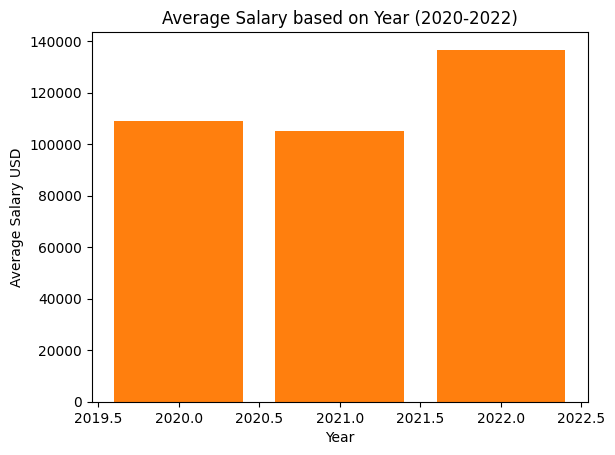

In [ ]:
plt.bar(average_salary_yearbasis['work_year'], average_salary_yearbasis['salary_in_usd'], color = "tab:orange", align = "center")
plt.xlabel("Year")
plt.ylabel("Average Salary USD")
plt.xticks = ['2020', '2021', '2022',]
plt.title("Average Salary based on Year (2020-2022)")
plt.show()

Salary on Basis of Employment Type

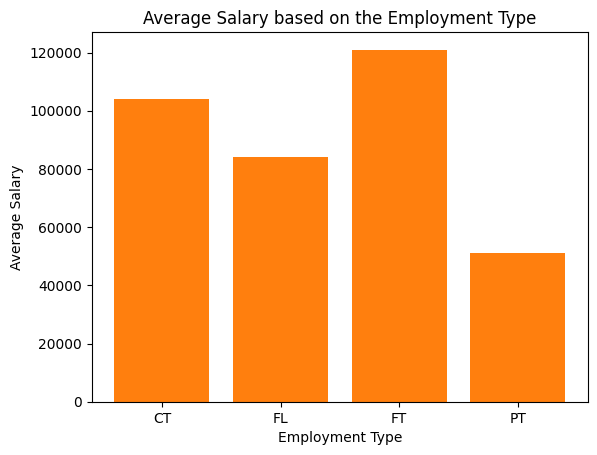

In [ ]:
plt.bar(average_salary_employbasis['employment_type'], average_salary_employbasis['salary_in_usd'], color = "tab:orange", align = "center")
plt.xlabel("Employment Type")
plt.ylabel("Average Salary")
plt.xticks = ['CT', 'FL', 'FT', 'PT']
plt.title("Average Salary based on the Employment Type")
plt.show()

Salary on Basis of Experience Level

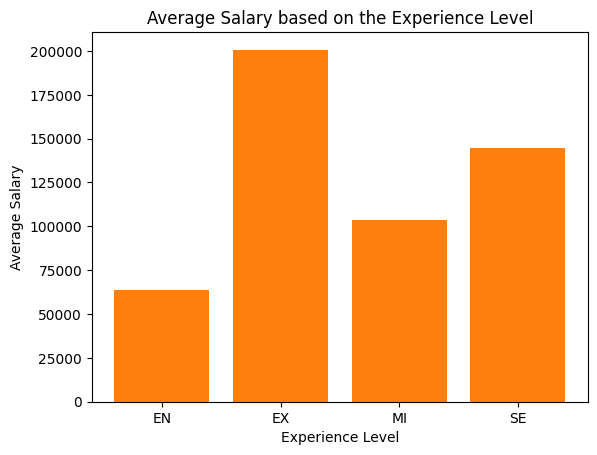

In [ ]:
plt.bar(average_salary_xpbasis['experience_level'], average_salary_xpbasis['salary_in_usd'], color = "tab:orange", align = "center")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary")
plt.xticks = ['EN', 'EX', 'MI', 'SE']
plt.title("Average Salary based on the Experience Level")
plt.show()

Salary on basis of Currency

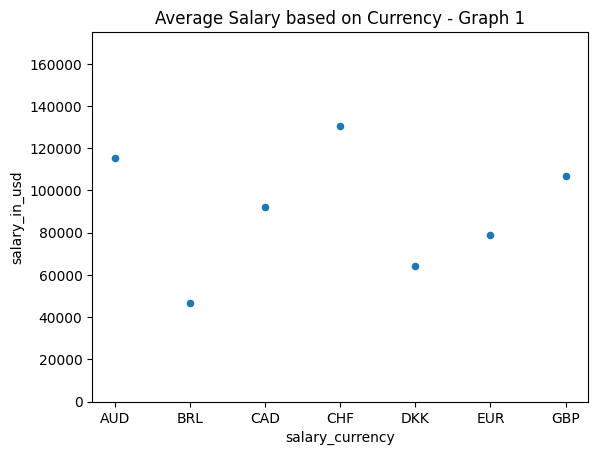

In [ ]:
average_salary_currbasis[0:7].plot.scatter(x = "salary_currency", y = "salary_in_usd")
plt.title("Average Salary based on Currency - Graph 1")
plt.ylim(0, 175000)
plt.show()

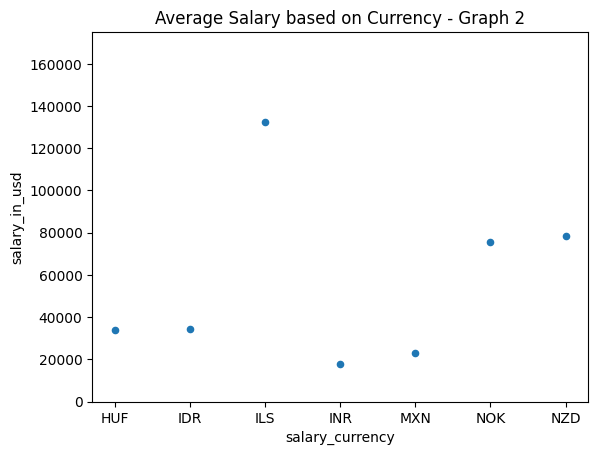

In [ ]:
average_salary_currbasis[7:14].plot.scatter(x = "salary_currency", y = "salary_in_usd")
plt.title("Average Salary based on Currency - Graph 2")
plt.ylim(0, 175000)
plt.show()

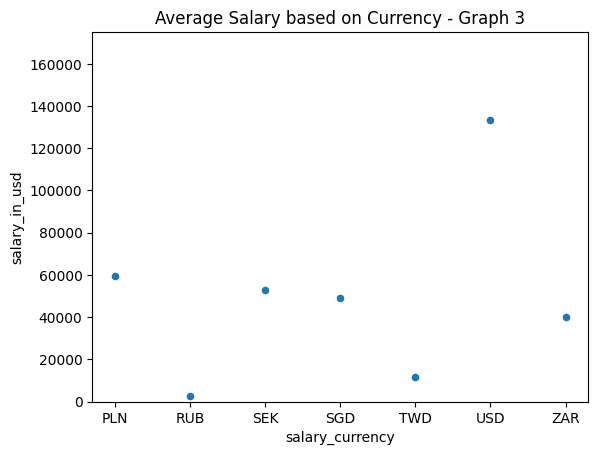

In [ ]:
average_salary_currbasis[14:21].plot.scatter(x = "salary_currency", y = "salary_in_usd")
plt.title("Average Salary based on Currency - Graph 3")
plt.ylim(0, 175000)
plt.show()

Salary on the basis of remote ratio

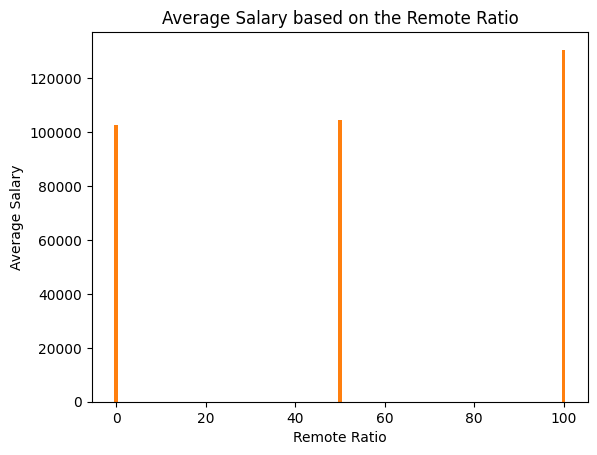

In [ ]:
plt.bar(average_salary_remotebasis['remote_ratio'], average_salary_remotebasis['salary_in_usd'], color = "tab:orange", align = "center")
plt.xlabel("Remote Ratio")
plt.ylabel("Average Salary")
plt.xticks = ['0', '50', '100']
plt.title("Average Salary based on the Remote Ratio")
plt.show()

Salary on the basis of company size

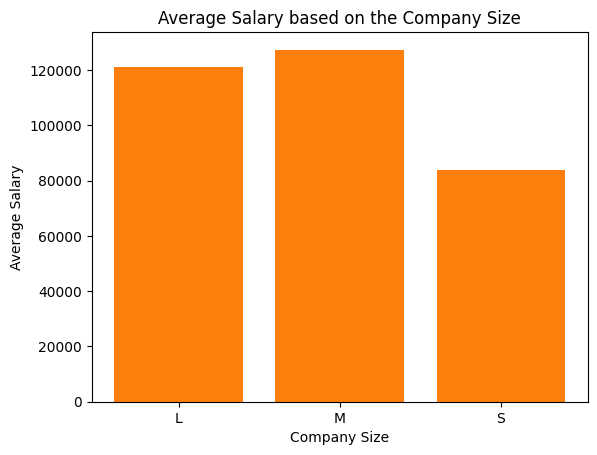

In [ ]:
plt.bar(average_salary_sizebasis['company_size'], average_salary_sizebasis['salary_in_usd'], color = "tab:orange", align = "center")
plt.xlabel("Company Size")
plt.ylabel("Average Salary")
plt.xticks = ['L', 'M', 'S']
plt.title("Average Salary based on the Company Size")
plt.show()

Salary on the Basis of Job Title

TypeError: 'list' object is not callable

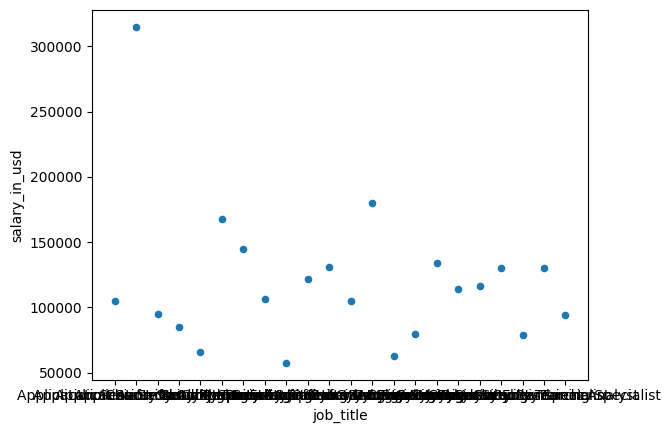

In [ ]:
average_salary_titlebasis[0:22].plot.scatter(x = "job_title", y = "salary_in_usd")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title")
plt.show()  

TypeError: 'list' object is not callable

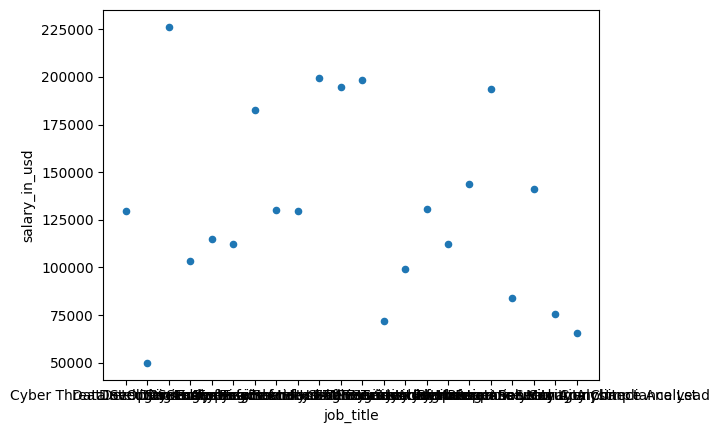

In [ ]:
average_salary_titlebasis[22:44].plot.scatter(x = "job_title", y = "salary_in_usd")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title")
plt.show()  

In [ ]:
average_salary_titlebasis[44:66].plot.scatter(x = "job_title", y = "salary_in_usd")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title")
plt.show()  

TypeError: 'list' object is not callable

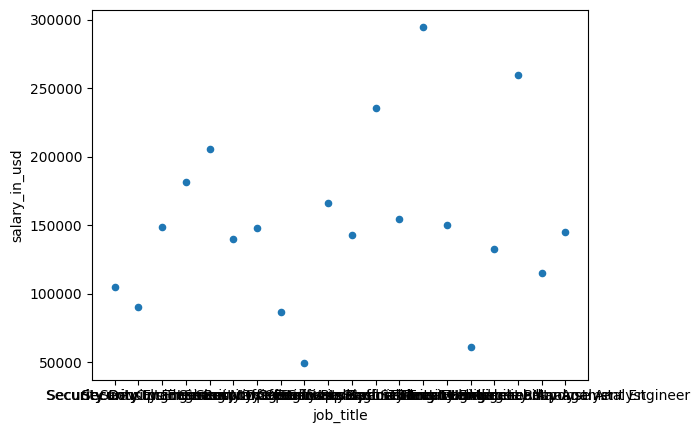

In [ ]:
average_salary_titlebasis[66:86].plot.scatter(x = "job_title", y = "salary_in_usd")
plt.xticks(rotation = 90)
plt.title("Average Salary Based off Job Title")
plt.show()  

Please see the written analysis PDF for the full detailed written analysis. 